Predicting Car Prices with K-nearest Regression

In [660]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

In [661]:
cars = pd.read_csv('../datasets/imports-85.data.txt', header= None)

In [662]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
0     205 non-null int64
1     205 non-null object
2     205 non-null object
3     205 non-null object
4     205 non-null object
5     205 non-null object
6     205 non-null object
7     205 non-null object
8     205 non-null object
9     205 non-null float64
10    205 non-null float64
11    205 non-null float64
12    205 non-null float64
13    205 non-null int64
14    205 non-null object
15    205 non-null object
16    205 non-null int64
17    205 non-null object
18    205 non-null object
19    205 non-null object
20    205 non-null float64
21    205 non-null object
22    205 non-null object
23    205 non-null int64
24    205 non-null int64
25    205 non-null object
dtypes: float64(5), int64(5), object(16)
memory usage: 41.7+ KB


In [663]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [664]:
cars.columns = cols

In [665]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [666]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [667]:
cars = cars.replace("?",np.nan)

In [668]:
cars["horsepower"] = cars["horsepower"].astype("float", inplace=True)

In [669]:
cars["peak-rpm"] = cars["peak-rpm"].astype("float", inplace=True)

In [670]:
cars["normalized-losses"] = cars["normalized-losses"].astype("float", inplace=True)

In [671]:
cars["bore"] = cars["bore"].astype("float", inplace=True)

In [672]:
cars["stroke"] = cars["stroke"].astype("float", inplace=True)

In [673]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-

In [674]:
cars = cars.fillna(cars.mean())

In [675]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-rate     205 non-null float64
horsepower           205 non-

In [676]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 
                          'price']

In [677]:
cars = cars[continuous_values_cols]

In [678]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    205 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression-rate     205 non-null float64
horsepower           205 non-null float64
peak-rpm             205 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(10), int64(3), object(1)
memory usage: 22.5+ KB


In [679]:
cars["price"] = cars["price"].astype("float")

In [680]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    205 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression-rate     205 non-null float64
horsepower           205 non-null float64
peak-rpm             205 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 22.5 KB


In [681]:
cars = cars.dropna(subset=['price'])

In [682]:
norm_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
cars_norm = cars[norm_cols] / cars[norm_cols].max()

In [683]:
cars_norm["price"] = cars["price"]

In [684]:
cars_norm.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.476562,0.732837,0.811148,0.890278,0.816054,0.626660,0.880711,0.642686,0.391304,0.423664,0.757576,0.428571,0.500000,13495.0
1,0.476562,0.732837,0.811148,0.890278,0.816054,0.626660,0.880711,0.642686,0.391304,0.423664,0.757576,0.428571,0.500000,16500.0
2,0.476562,0.781638,0.822681,0.909722,0.876254,0.694294,0.680203,0.832134,0.391304,0.587786,0.757576,0.387755,0.481481,16500.0
3,0.640625,0.825476,0.848630,0.919444,0.908027,0.574766,0.809645,0.815348,0.434783,0.389313,0.833333,0.489796,0.555556,13950.0
4,0.640625,0.822167,0.848630,0.922222,0.908027,0.694540,0.809645,0.815348,0.347826,0.438931,0.833333,0.367347,0.407407,17450.0


Starting with a Univariate k-nearest model

In [685]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(train_col,targ_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df)/(2))
    train_set = rand_df.iloc[0:half].copy()
    test_set = rand_df.iloc[half:].copy()
    model = KNeighborsRegressor()
    model.fit(train_set[[train_col]], train_set[targ_col])
    predicted_price = model.predict(test_set[[train_col]])
    rmse = np.sqrt(mean_squared_error(predicted_price, test_set[targ_col]))
    return rmse

In [686]:
rmse = knn_train_test("horsepower", "price", cars_norm)
rmse

4062.3607492478686

In [687]:
cars_norm["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [688]:
rmses = {}
for col in norm_cols:
    rmse = knn_train_test(col, "price", cars_norm)
    rmses[col] = rmse
rmse_result = pd.Series(rmses)

In [689]:
rmses

{'bore': 6789.972838715561,
 'city-mpg': 4815.490311052613,
 'compression-rate': 6610.657473570332,
 'curb-weight': 4448.106112506626,
 'height': 7796.075746803707,
 'highway-mpg': 4634.736623617035,
 'horsepower': 4062.3607492478686,
 'length': 5426.836266059062,
 'normalized-losses': 7339.675755133537,
 'peak-rpm': 7649.170564081823,
 'stroke': 7951.518534117608,
 'wheel-base': 5460.851458362242,
 'width': 4830.1192938551}

In [690]:
rmse_result = pd.Series(rmses)

In [691]:
rmse_result

bore                 6789.972839
city-mpg             4815.490311
compression-rate     6610.657474
curb-weight          4448.106113
height               7796.075747
highway-mpg          4634.736624
horsepower           4062.360749
length               5426.836266
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7951.518534
wheel-base           5460.851458
width                4830.119294
dtype: float64

In [692]:
def knn_train_test2(train_col,targ_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df)/(2))
    train_set = rand_df.iloc[0:half].copy()
    test_set = rand_df.iloc[half:].copy()
    rmses = {}
    for i in [1,3,5,7,9]:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(train_set[[train_col]], train_set[targ_col])
        predicted_price = model.predict(test_set[[train_col]])
        rmse = np.sqrt(mean_squared_error(predicted_price, test_set[targ_col]))
        rmses[i] = rmse
    return rmses

In [693]:
norm_cols

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [694]:
columns = norm_cols
rmses_results = {}
rmses_int = {}
for col in columns:
    rmses = knn_train_test2(col, "price", cars_norm)
    rmses_results[col] = rmses

rmses_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6789.972838715561,
  7: 6820.838642100547,
  9: 6866.272034909252},
 'city-mpg': {1: 5863.190943471308,
  3: 4644.118807637241,
  5: 4815.490311052613,
  7: 4946.51554849771,
  9: 5232.6650173540265},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.657473570332,
  7: 6750.1686085824385,
  9: 7051.0916112614905},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.318011757233,
  5: 4448.106112506626,
  7: 4329.525204670641,
  9: 4632.497106001295},
 'height': {1: 8904.04645636071,
  3: 8268.260644059777,
  5: 7796.075746803707,
  7: 7624.203961561125,
  9: 7769.42711887634},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.908507167689,
  5: 4634.736623617035,
  7: 4771.561909942722,
  9: 5260.734903704089},
 'horsepower': {1: 4170.054848037801,
  3: 4037.298231342451,
  5: 4062.3607492478686,
  7: 4380.48161318677,
  9: 4516.549891821715},
 'length': {1: 4678.174812280686,
  3: 5168.115504300052,
 

In [695]:
rmses_results.items()

dict_items([('normalized-losses', {1: 7836.7752643899685, 3: 7516.084828453897, 9: 7794.746366502435, 5: 7339.675755133537, 7: 7759.126829130677}), ('horsepower', {1: 4170.054848037801, 3: 4037.298231342451, 9: 4516.549891821715, 5: 4062.3607492478686, 7: 4380.48161318677}), ('peak-rpm', {1: 9511.480067750124, 3: 8537.550899973421, 9: 7408.8682113536215, 5: 7649.170564081823, 7: 7549.741950042047}), ('compression-rate', {1: 8087.205346523092, 3: 7375.063685578359, 9: 7051.0916112614905, 5: 6610.657473570332, 7: 6750.1686085824385}), ('wheel-base', {1: 4493.734068810494, 3: 5208.39331165465, 9: 5738.590106748752, 5: 5460.851458362242, 7: 5448.460978918332}), ('bore', {1: 8602.58848450066, 3: 6984.239489480916, 9: 6866.272034909252, 5: 6789.972838715561, 7: 6820.838642100547}), ('highway-mpg', {1: 6025.594966720739, 3: 4627.908507167689, 9: 5260.734903704089, 5: 4634.736623617035, 7: 4771.561909942722}), ('length', {1: 4678.174812280686, 3: 5168.115504300052, 9: 5432.790508833493, 5: 542

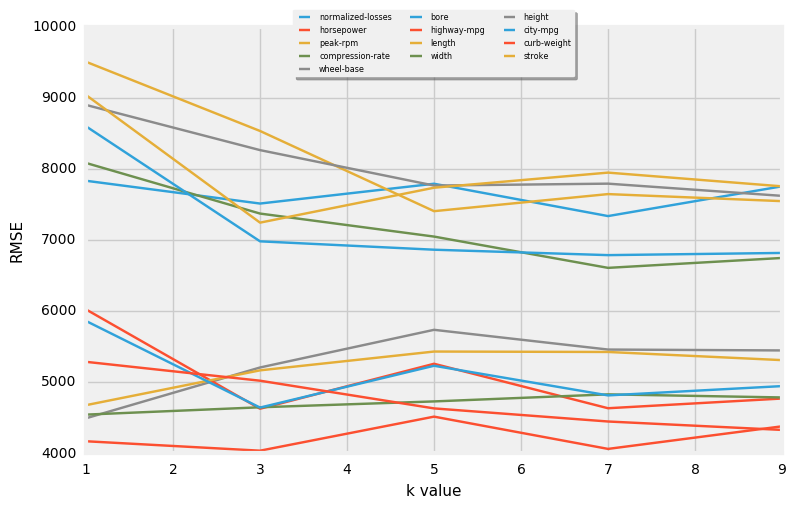

In [696]:
import matplotlib.pyplot as plt
%matplotlib inline 
minimal_rmse_list = {}
plt.style.use('seaborn-notebook')
labels = []
for k,v in rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot([1,3,5,7,9],y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    minimal_rmse_list[k] = np.mean(y)
    labels.append(str(k))
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), 
               ncol=3, fancybox=True, shadow=True, fontsize="xx-small")

    

In [697]:
minimal_rmse_list

{'bore': 7212.782297941388,
 'city-mpg': 5100.3961256025805,
 'compression-rate': 7174.837345103142,
 'curb-weight': 4744.093201503363,
 'height': 8072.402785532332,
 'highway-mpg': 5064.107382230455,
 'horsepower': 4233.349066727322,
 'length': 5203.5601416217105,
 'normalized-losses': 7649.281808722104,
 'peak-rpm': 8131.362338640209,
 'stroke': 7947.829607921592,
 'wheel-base': 5270.005984898894,
 'width': 4708.1259955825935}

In [698]:
two_feat = min(minimal_rmse_list, key=minimal_rmse_list.get)

In [699]:
import operator
sorted_rmse = sorted(minimal_rmse_list.items(), key=operator.itemgetter(1))
sorted_rmse

[('horsepower', 4233.349066727322),
 ('width', 4708.1259955825935),
 ('curb-weight', 4744.093201503363),
 ('highway-mpg', 5064.107382230455),
 ('city-mpg', 5100.3961256025805),
 ('length', 5203.5601416217105),
 ('wheel-base', 5270.005984898894),
 ('compression-rate', 7174.837345103142),
 ('bore', 7212.782297941388),
 ('normalized-losses', 7649.281808722104),
 ('stroke', 7947.829607921592),
 ('height', 8072.402785532332),
 ('peak-rpm', 8131.362338640209)]

In [700]:
sorted_features = []
for item in sorted_rmse:
    sorted_features.append(item[0])
sorted_features

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'city-mpg',
 'length',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'height',
 'peak-rpm']

In [701]:
def knn_train_test3(train_cols,targ_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df)/(2))
    train_set = rand_df.iloc[0:half].copy()
    test_set = rand_df.iloc[half:].copy()
    
    model = KNeighborsRegressor()
    model.fit(train_set[train_cols], train_set[targ_col])
    predicted_price = model.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(predicted_price, test_set[targ_col]))
    return rmse

In [702]:
rmses_multi = {}
for i in range(2,6,1):
    rmse = knn_train_test3(sorted_features[0:i],"price",cars_norm)
    rmses_multi[str(i) + " features"] = rmse

In [703]:
rmses_multi

{'2 features': 3668.955508798731,
 '3 features': 3221.5146799707945,
 '4 features': 3255.663106491564,
 '5 features': 3344.105819420963}

In [704]:
def knn_train_test4(train_cols,targ_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df)/(2))
    train_set = rand_df.iloc[0:half].copy()
    test_set = rand_df.iloc[half:].copy()
    rmses_with_hyperparam = {}
    for i in range(1,26,1):
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(train_set[train_cols], train_set[targ_col])
        predicted_price = model.predict(test_set[train_cols])
        rmse = np.sqrt(mean_squared_error(predicted_price, test_set[targ_col]))
        rmses_with_hyperparam[i] = rmse
    return rmses_with_hyperparam

In [705]:
rmses_multi_param = {}
for i in range(2,5,1):
    rmse = knn_train_test4(sorted_features[0:i],"price",cars_norm)
    rmses_multi_param[str(i) + " features"] = rmse

In [706]:
rmses_multi_param

{'2 features': {1: 3278.275435603782,
  2: 3172.511637738175,
  3: 3321.863601937772,
  4: 3439.553723948173,
  5: 3668.955508798731,
  6: 3787.760553727788,
  7: 4015.280100580582,
  8: 4201.618865707251,
  9: 4222.256241988474,
  10: 4430.419972371034,
  11: 4436.961308316933,
  12: 4416.146987360294,
  13: 4554.258506744368,
  14: 4732.336438852271,
  15: 4882.109699425825,
  16: 4996.104717884252,
  17: 5086.207078347438,
  18: 5142.234653093761,
  19: 5176.679730121361,
  20: 5153.537983168495,
  21: 5102.957044818842,
  22: 5093.582671008411,
  23: 5116.814715352969,
  24: 5124.287645255827,
  25: 5133.476430234223},
 '3 features': {1: 3341.7224007928003,
  2: 3038.759014225158,
  3: 3041.0141990191137,
  4: 2955.761949226468,
  5: 3221.5146799707945,
  6: 3540.961428056439,
  7: 3797.040500486639,
  8: 4003.677557918278,
  9: 4075.290191669132,
  10: 4225.049450691918,
  11: 4338.870494786189,
  12: 4428.084138858935,
  13: 4495.297516180466,
  14: 4539.722027707901,
  15: 4614.

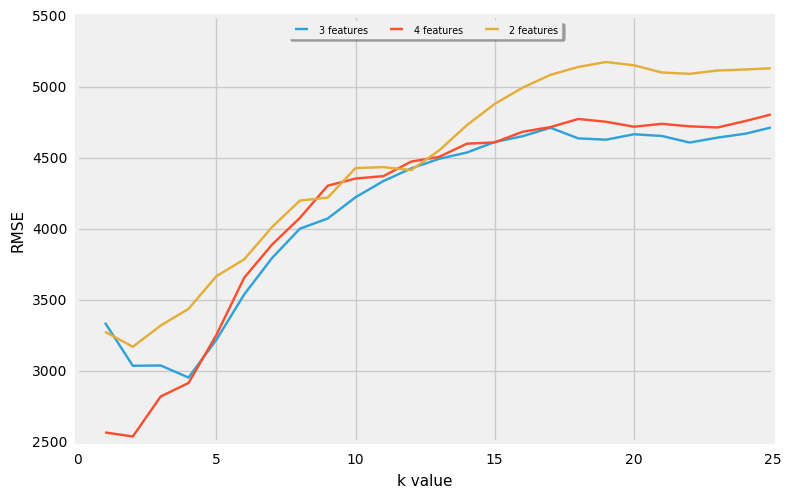

In [707]:
labels = []
for k,v in rmses_multi_param.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    labels.append(str(k))
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.), 
               ncol=3, fancybox=True, shadow=True, fontsize="x-small")

In [709]:
rmses_min = {}
for k,v in rmses_multi_param.items():
    x = list(v.keys())
    y = list(v.values())
    min_val = min(y)
    rmses_min[str(k) + ", " + str(min(v, key=v.get)) + " neighbors"] = min_val
rmses_min

{'2 features, 2 neighbors': 3172.511637738175,
 '3 features, 4 neighbors': 2955.761949226468,
 '4 features, 2 neighbors': 2541.1262544566944}

In [845]:
from sklearn.model_selection import cross_val_score, KFold
def knn_train_test5(train_cols,targ_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(rand_df)/(2))
    train_set = rand_df.iloc[0:half].copy()
    test_set = rand_df.iloc[half:].copy()
    rmse_fold = {}
    for x in range(8,13,2):
        model = KNeighborsRegressor(n_neighbors=5)
        kf = KFold(x, shuffle=True, random_state=1)
        mses = cross_val_score(model, train_set[train_cols], train_set[targ_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        rmses = int(round(np.average(rmses),0))
        rmse_fold[str(x) + " folds"] = rmses
    return rmse_fold

In [846]:
rmses_cross_val = {}
for i in range(2,5,1):
    rmse = knn_train_test5(sorted_features[0:i],"price",cars_norm)
    rmses_cross_val[str(i) + " features"] = rmse
rmses_cross_val

{'2 features': {'10 folds': 3462, '12 folds': 3551, '8 folds': 3698},
 '3 features': {'10 folds': 3287, '12 folds': 3405, '8 folds': 3548},
 '4 features': {'10 folds': 3273, '12 folds': 3379, '8 folds': 3455}}

In [808]:
rmses_min_f = {}
for k,o in rmses_cross_val.items():
    for u,v in o.items():
        x = list(v.keys())
        y = list(v.values())
        min_val = min(y)
        print(min_val)
        rmses_min_f[str(u) + ", " + str(min(v, key=v.get))] = min_val
rmses_min_f


3250
3250
3257
3257
3369
3369


{'3 neighbors, 10 folds': 3369, '4 neighbors, 10 folds': 3369}